# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
Dataset ini berasal dari tahun 1988 dan terdiri dari empat basis data: Cleveland, Hungary, Switzerland, dan Long Beach V. Dataset ini memiliki 76 atribut, termasuk atribut yang diprediksi, namun semua eksperimen yang dipublikasikan hanya menggunakan subset dari 14 atribut tersebut. Kolom "target" mengacu pada keberadaan penyakit jantung pada pasien. Nilai pada kolom ini berupa bilangan bulat: 0 = tidak ada penyakit, dan 1 = mengidap penyakit.

Attribute Information:

- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
 The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
pip freeze > requirements.txt


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("/content/drive/MyDrive/AI/Laskar AI/dataset/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
#statistik deskriptif pada tiap variabel
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


cek duplicated data

In [5]:
df.duplicated().sum()

np.int64(723)

Melihat Distribusi Data terhadap target

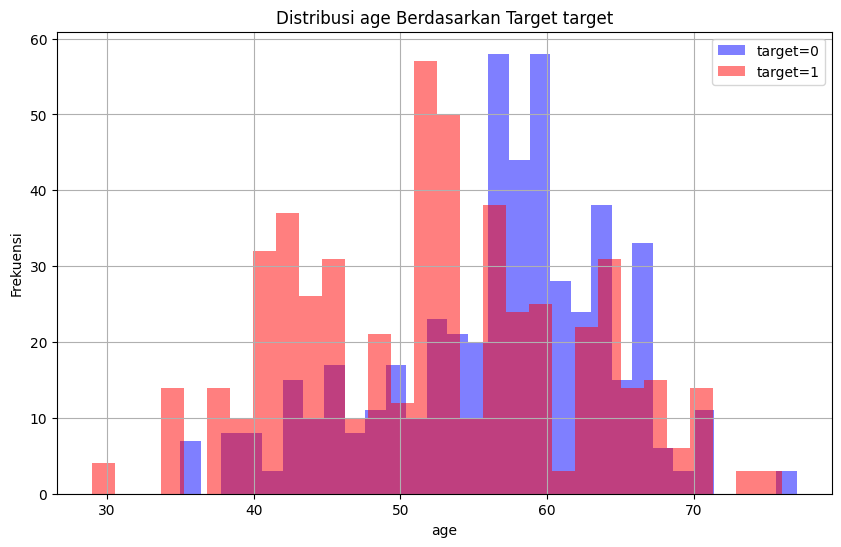

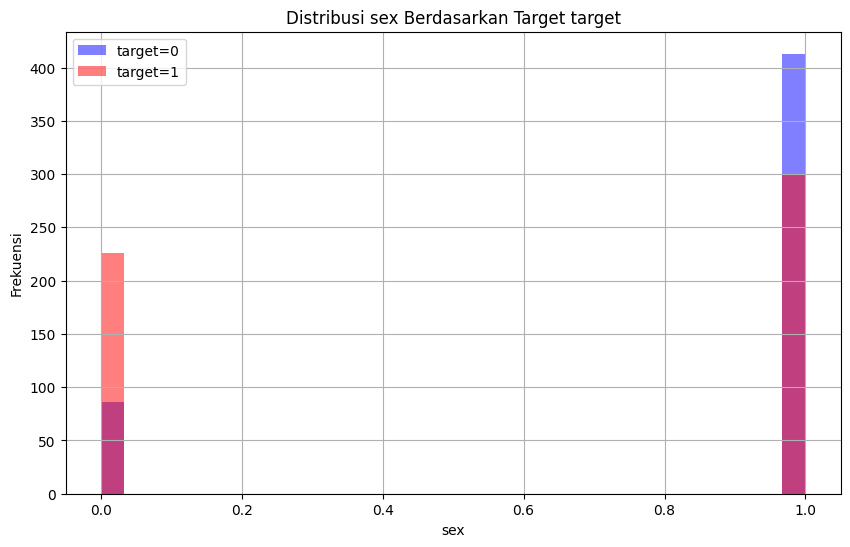

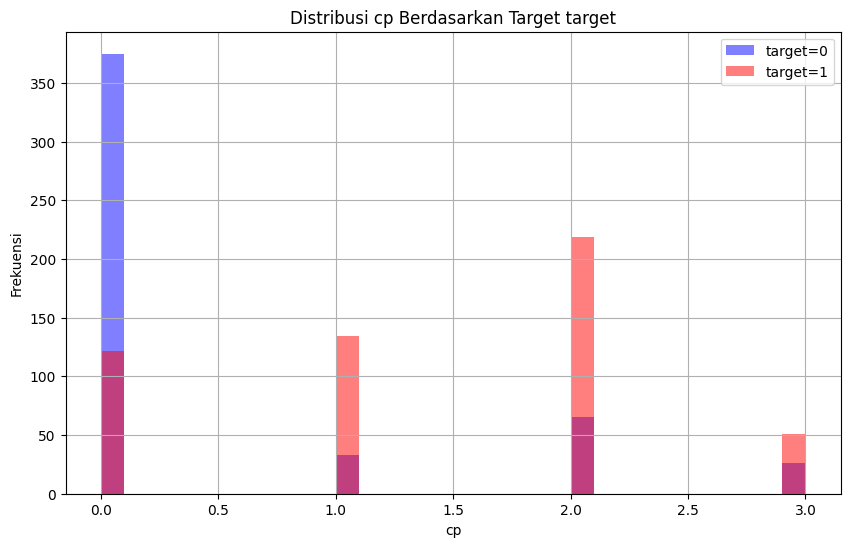

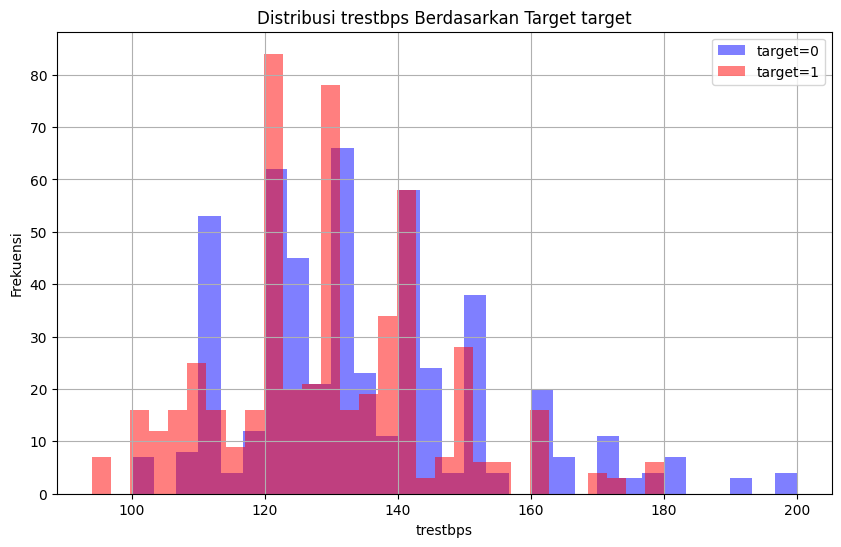

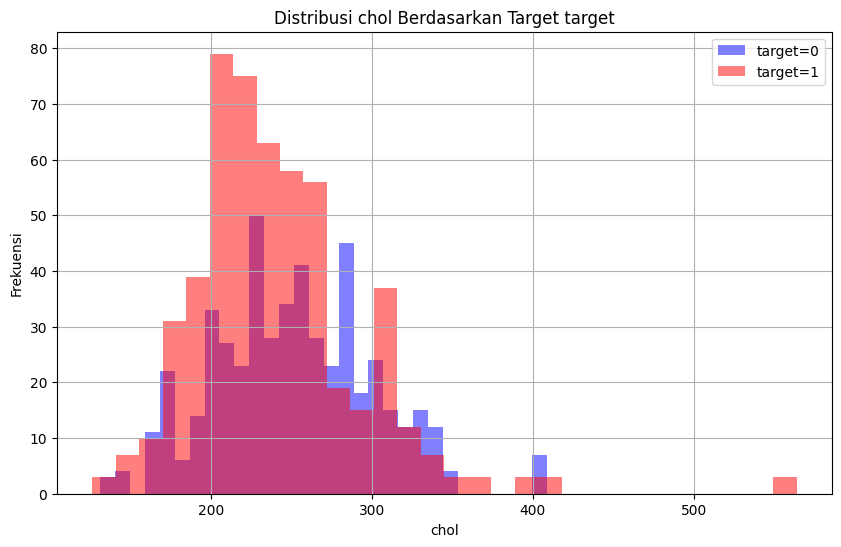

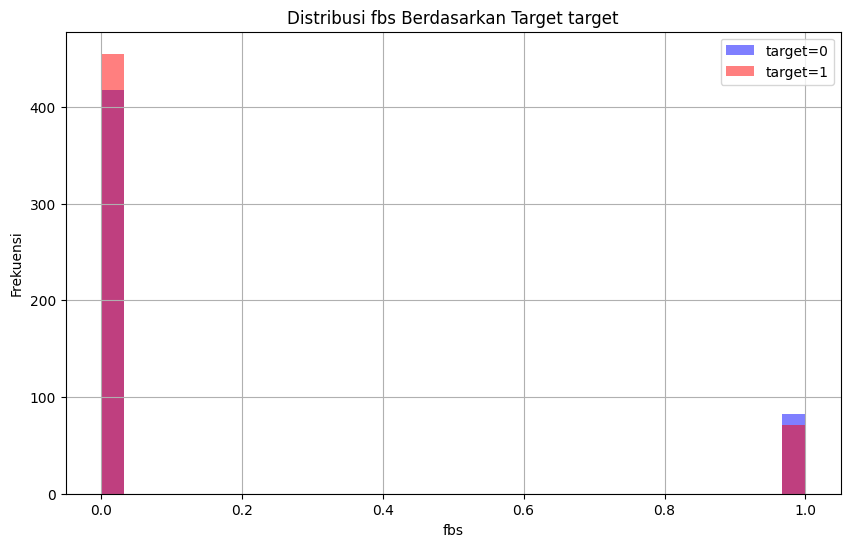

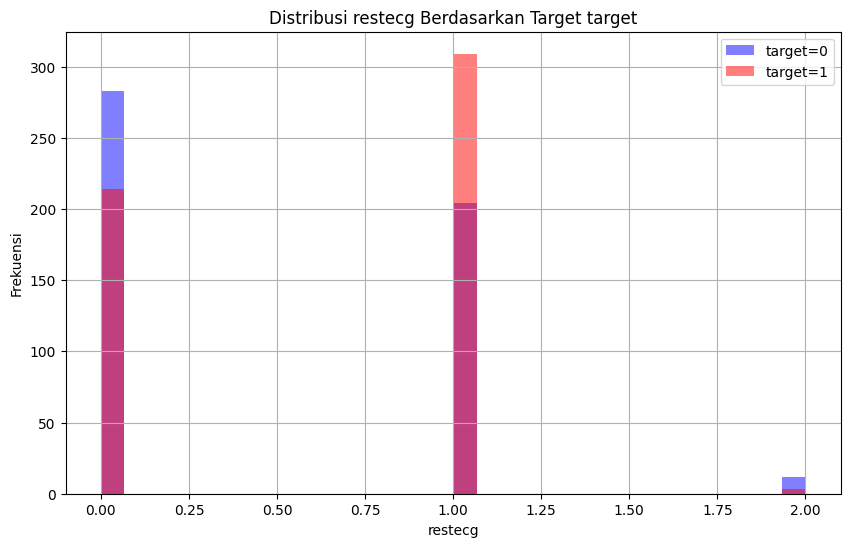

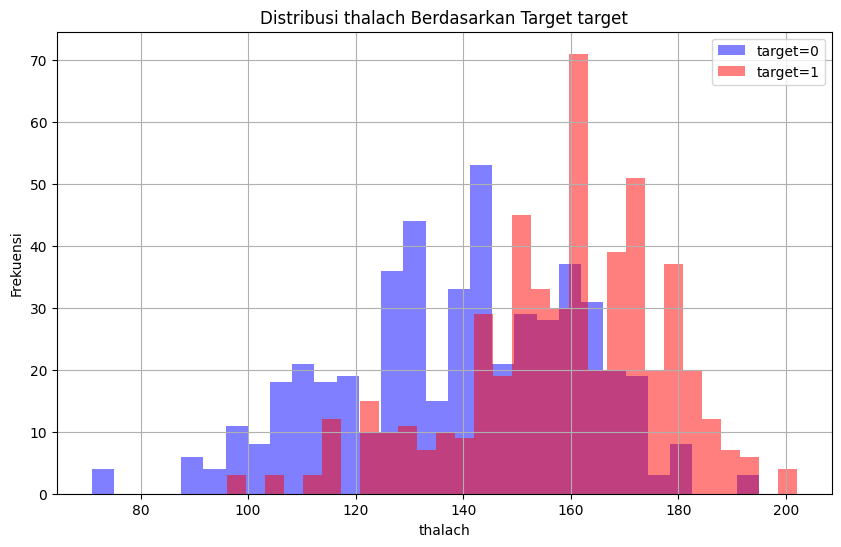

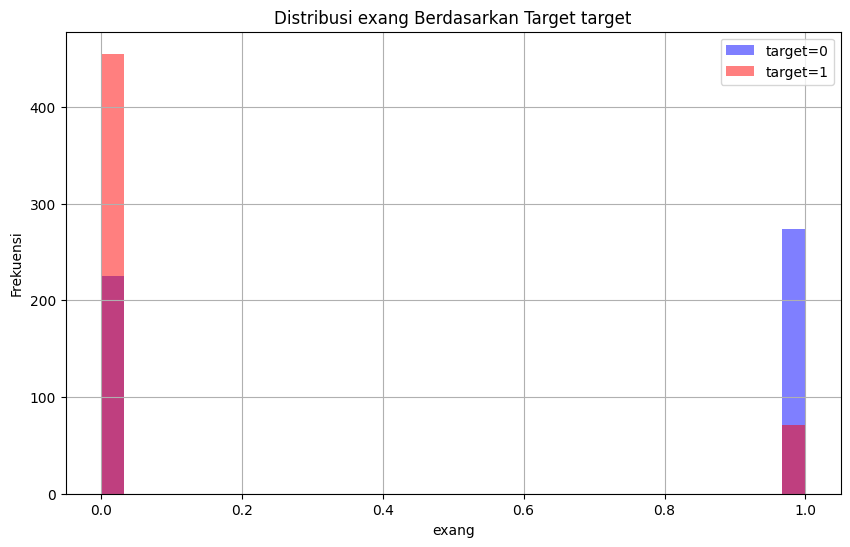

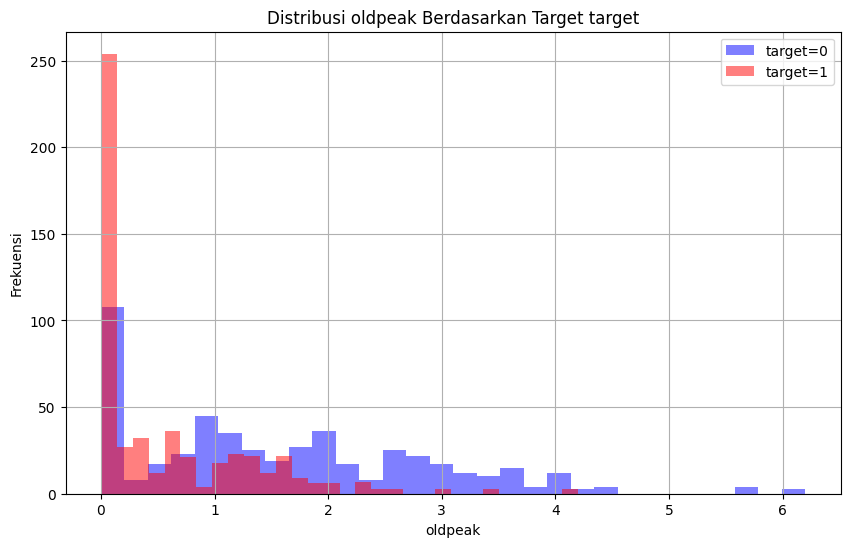

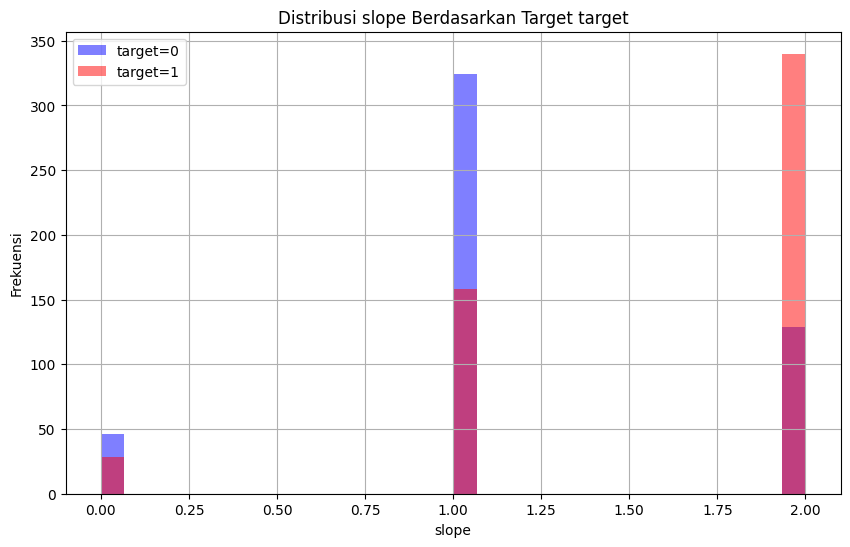

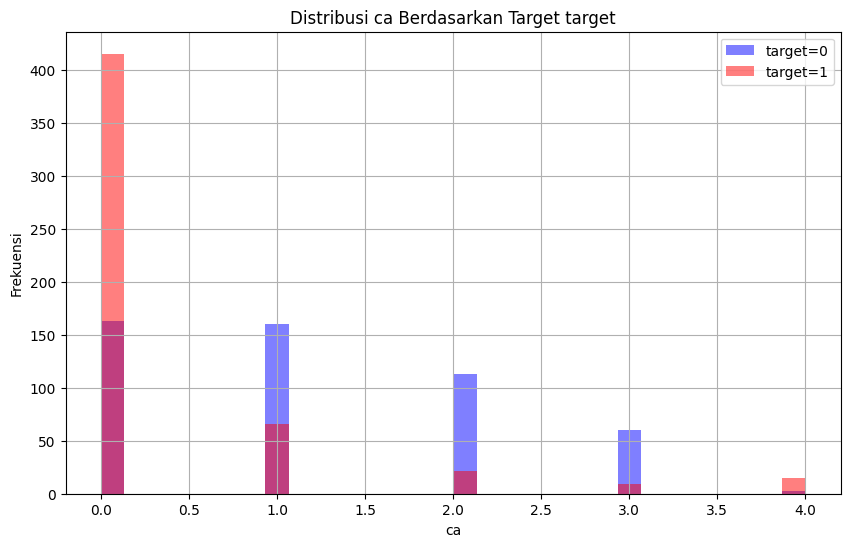

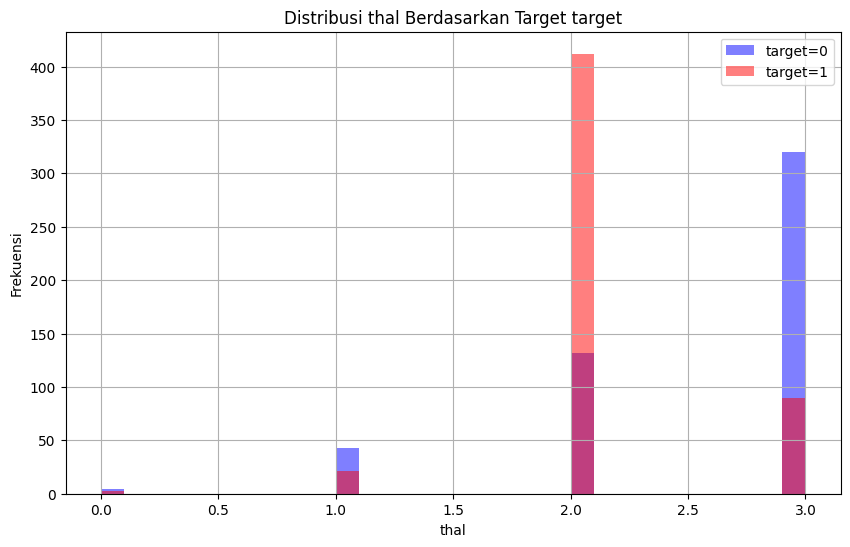

In [6]:
for column in df.columns:
    if column != 'target':  # Menghindari kolom 'target'
        plt.figure(figsize=(10, 6))
        df[df['target'] == 0][column].hist(alpha=0.5, color='blue', bins=30, label='target=0')
        df[df['target'] == 1][column].hist(alpha=0.5, color='red', bins=30, label='target=1')
        plt.legend()
        plt.title(f'Distribusi {column} Berdasarkan Target target')
        plt.xlabel(column)
        plt.ylabel('Frekuensi')
        plt.show()

Melihat Distribusi umur terhadp target

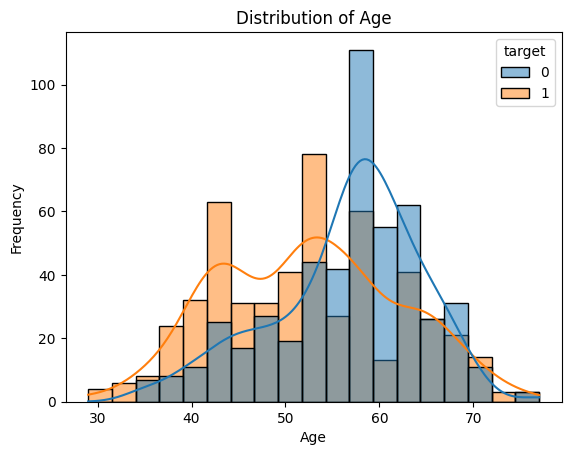

In [7]:
sns.histplot(data=df, x="age", kde=True, hue="target")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

Melihat Distribusi sex terhadap target

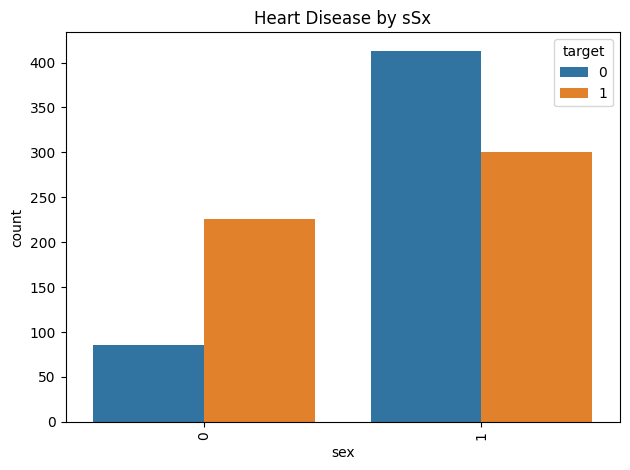

In [8]:
sns.countplot(data=df, x="sex", hue="target")
plt.title("Heart Disease by sSx")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Cek Imbalance data

target
1    526
0    499
Name: count, dtype: int64


<ipython-input-9-52670645c594>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Kolom_target.index, y=Kolom_target.values, palette='Set2')


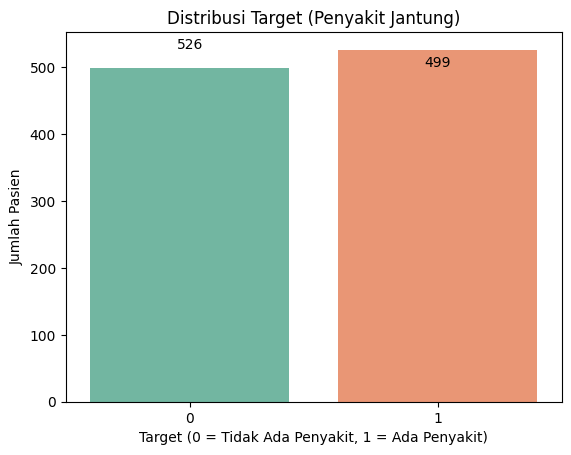

In [9]:
# Menghitung jumlah nilai dalam kolom 'target'
Kolom_target = df['target'].value_counts()

# Menampilkan hasil
print(Kolom_target)
# Membuat barplot
sns.barplot(x=Kolom_target.index, y=Kolom_target.values, palette='Set2')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Target (Penyakit Jantung)')
plt.xlabel('Target (0 = Tidak Ada Penyakit, 1 = Ada Penyakit)')
plt.ylabel('Jumlah Pasien')

# Menampilkan nilai di atas bar
for i, v in enumerate(Kolom_target.values):
    plt.text(i, v + 1, str(v), ha='center')

# Tampilkan plot
plt.show()

data masih balnace antar class

Cek Outlier di kolom numerik

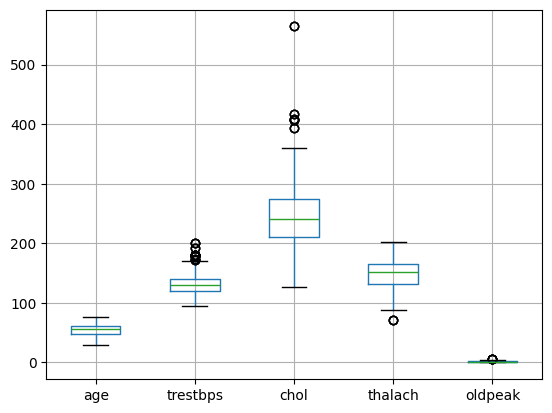

In [10]:
df[["age", "trestbps", "chol", "thalach", "oldpeak"]].boxplot() #mengecek outlier menggunakan boxplot
plt.show()


Checking the Uniq Value of a column

In [11]:
def checkUniq(col):
    """Returns the unique values of a specified column in the DataFrame."""
    res = df[col].unique()
    return res


columns = ["cp", "restecg", "exang", "slope", "ca", "thal", "trestbps"]

for column in columns:
    print(f"uniq {column}: ")
    print(checkUniq(column))

uniq cp: 
[0 1 2 3]
uniq restecg: 
[1 0 2]
uniq exang: 
[0 1]
uniq slope: 
[2 0 1]
uniq ca: 
[2 0 1 3 4]
uniq thal: 
[3 2 1 0]
uniq trestbps: 
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]


Cek Corelasi antar kolom ke target

In [12]:
# korelasi antar kolom
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


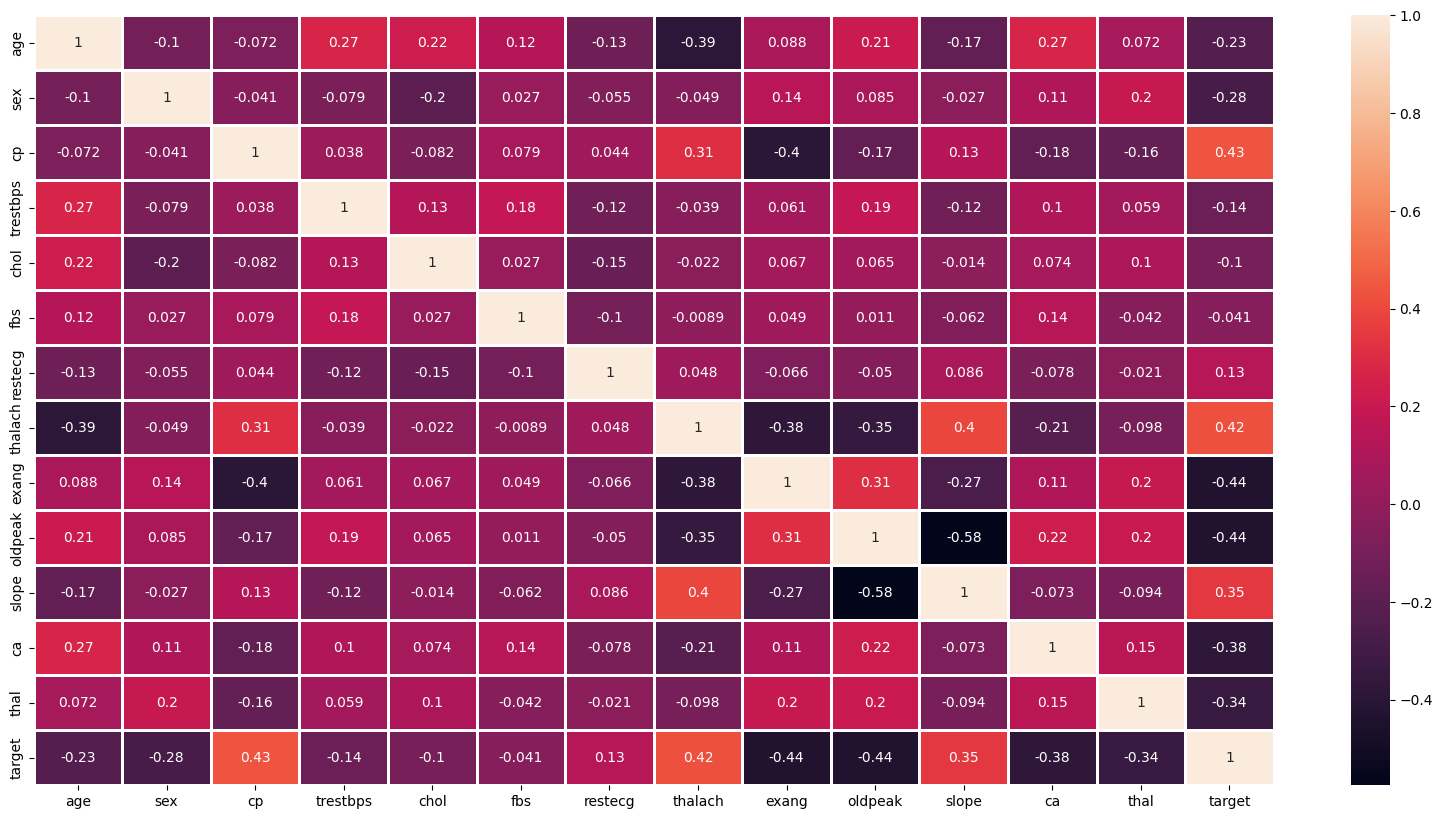

In [13]:
# heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=1, linecolor="white")
plt.show()

Fitur yang paling berpengaruh positif terhadap kemungkinan penyakit jantung (positif target = 1): cp, thalach, slope

Fitur yang paling berpengaruh negatif terhadap kemungkinan penyakit jantung: exang, oldpeak, ca, thal

Fitur seperti chol, fbs, dan trestbps menunjukkan korelasi rendah atau hampir tidak relevan secara linier dengan target.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

 Menghapus data duplicated

In [14]:
# Menghapus baris yang duplikat
df = df.drop_duplicates()
# Menampilkan jumlah data setelah dihapus
print(f"Jumlah data setelah menghapus duplikat: {df.shape[0]}")


Jumlah data setelah menghapus duplikat: 302


Penanganan Outlier

In [15]:
# Daftar kolom yang akan diperiksa outlier-nya
columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Menggunakan IQR untuk menghapus outlier
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Menampilkan jumlah data setelah outlier dihapus
print(f"Jumlah data setelah menghapus outlier: {df.shape[0]}")


Jumlah data setelah menghapus outlier: 283


Split data sebelum training

In [16]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('target', axis=1)
y = df['target']

# Membagi data menjadi set pelatihan dan pengujian (misalnya 80% pelatihan, 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Ukuran set pelatihan (features):", X_train.shape)
print("Ukuran set pengujian (features):", X_test.shape)
print("Ukuran set pelatihan (target):", y_train.shape)
print("Ukuran set pengujian (target):", y_test.shape)

Ukuran set pelatihan (features): (226, 13)
Ukuran set pengujian (features): (57, 13)
Ukuran set pelatihan (target): (226,)
Ukuran set pengujian (target): (57,)
